# Imports

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from src.data_processing.column_import import s_x ,s_y ,v_x ,v_y ,a_x ,a_y 
from definitions import ROOT_DIR

Importet column directory
../../data/processed/x_y_recording_00_range_384.csv


## Load models 

In [3]:
# Load the models
def load_model(model_name):
    model_file_path = os.path.join(ROOT_DIR, f'models/acceleration_model_4/{model_name}.pkl')
    
    if os.path.exists(model_file_path):
        with open(model_file_path, 'rb') as file:
            loaded_model = pickle.load(file)
        
        print(f'Model "{model_name}" loaded from: {model_file_path}')
        return loaded_model
    else:
        print(f'Model file not found for "{model_name}"')
        return None

loaded_first_model = load_model('first_model')
loaded_second_model = load_model('second_model')

Model "first_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/models/acceleration_model_4/first_model.pkl
Model "second_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/models/acceleration_model_4/second_model.pkl


## Load the coefficients

In [4]:
# Get the coefficients
c_1_overline = loaded_first_model.coef_[0]
c_3_overline = loaded_first_model.coef_[1]
c_2_overline = loaded_second_model.coef_[0]
c_4_overline = loaded_second_model.coef_[1]

print(f'C̅₁: {c_1_overline}')
print(f'C̅₂: {c_2_overline}')
print(f'C̅₃: {c_3_overline}')
print(f'C̅₄: {c_4_overline}')

C̅₁: -0.9952219042872908
C̅₂: -0.9952386680963472
C̅₃: 0.0004375584277085994
C̅₄: 2.848228071024513e-07


Rearange the constants:
\begin{align}
c_2 =  \frac{1}{\overline c_2}
\\ c_1 = \overline c_1  \overline c_2
\\ c_4 = \frac{1}{\overline c_4}
\\ c_3 = \overline c_3 \overline c_4
\end{align}



In [5]:
# Rearange the coefficients
c_1 = c_1_overline * c_2_overline
c_2 = 1 / c_2_overline
c_3 = c_3_overline * c_4_overline
c_4 = 1 / c_4_overline

print(f'c₁: {c_1}')
print(f'c₂: {c_2}')
print(f'c₃: {c_3}')
print(f'c₄: {c_4}')

c₁: 0.9904833224831937
c₂: -1.0047841106422846
c₃: 1.2462661965129827e-10
c₄: 3510954.793870486


# Integration method

Now we put the constants into our integration model and test it on accuracy
\begin{align}
v(k+1) &= v(k) + c_1 a(k) + c_2(k-1)\\
s(k+1) &= s(k) + dt  \ v(k)+ c_3 a(k) + c_4 a(k-1)
\end{align}

We have to split each entry into its x- and y-components
\begin{align}
v_x(k+1)    &= v_x(k) + c_1 a_x(k)  +  c_2a_x(k-1)
\\ v_y(k+1) &= v_y(k) + c_1 a_y(k)  + c_2 a_y(k-1)
\\ s_x(k+1) &= s_x(k) + dt  \ v_x(k)+ c_3 a_x(k) + c_4 a_x(k-1)
\\ s_y(k+1) &= s_y(k) + dt \ v_y(k) + c_3 a_y(k) + c_4 a_y(k-1)
\end{align}




In [6]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [7]:
v_x_test = v_x[1:-1] + c_1 * a_x[1:-1] + c_2 * a_x[0:-2]
v_y_test = v_y[1:-1] + c_1 * a_y[1:-1] + c_2 * a_y[0:-2]


In [8]:
dt = 0.04
s_x_test = s_x[1:-1] + dt * v_x[1:-1] + c_3 * a_x[1:-1] + c_4 * a_x[0:-2]
s_y_test = s_y[1:-1] + dt * v_y[1:-1] + c_3 * a_y[1:-1] + c_4 * a_y[0:-2]


0.04550642911333071


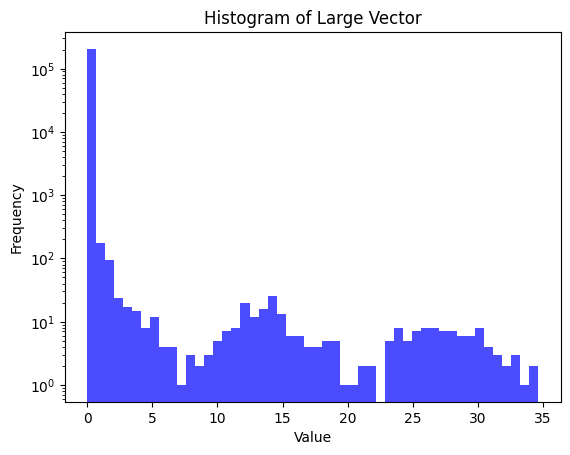

0.03536963007831693


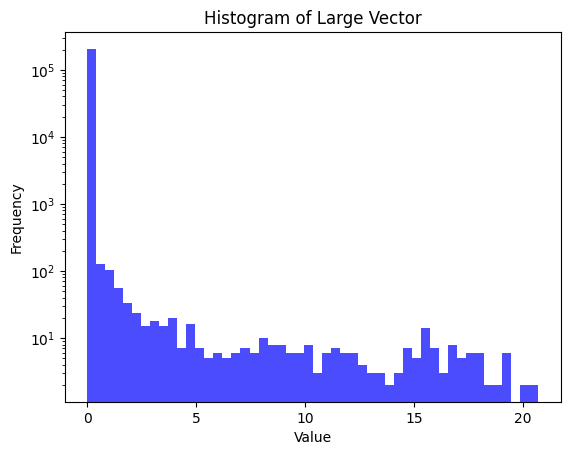

1052493.9498954876


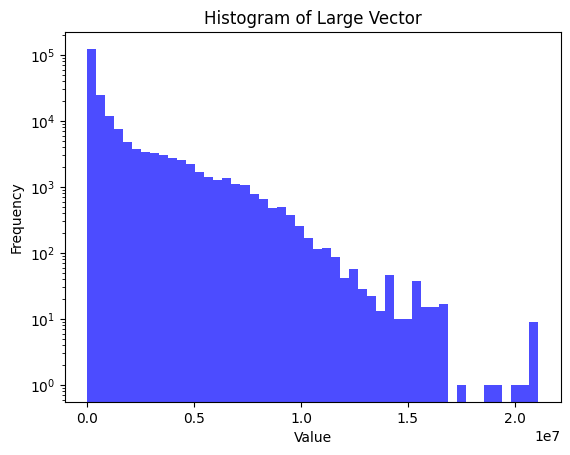

1068187.7405820575


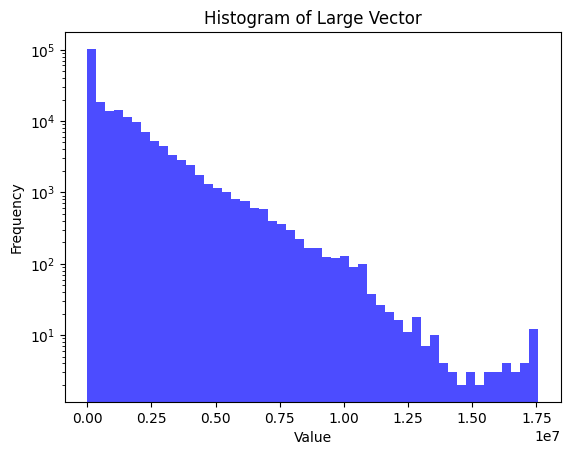

In [9]:
def mean_error(actual, test):
    difference = np.abs(actual - test)
    
    # Calculate the
    mean = np.mean(difference)
    print(mean)

    # Print a bar graph
    plt.hist(difference, bins=50, color='blue', alpha=0.7, log=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Large Vector')
    plt.show()



mean_error(v_x_test, v_x[2:])
mean_error(v_y_test, v_y[2:])
mean_error(s_x_test, s_x[2:])
mean_error(s_y_test, s_y[2:])